# Opening a New Shopping Mall in Pune City

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geocoder # to get coordinates

import requests # library to handle requests

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print("Libraries imported.")
%matplotlib inline

Libraries imported.


In [2]:
df=pd.read_csv("Pune_Localities.csv")

In [3]:
df.head()

,Localities_name,Localities_url
0,Alandi Road,https://www.mapsofindia.com/pune/localities/al...
1,Ambegaon Budruk,https://www.mapsofindia.com/pune/localities/am...
2,Anandnagar,https://www.mapsofindia.com/pune/localities/an...
3,Aundh,https://www.mapsofindia.com/pune/localities/au...
4,Aundh Road,https://www.mapsofindia.com/pune/localities/au...


In [4]:
df.shape

(96, 2)

# Get geographical coordinates

In [5]:
# define a function to get coordinates
def get_latlng(Localities_name):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Pune, Maharashtra'.format(Localities_name))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [6]:
# call the function to get the coordinates, store in a new list using list comprehension
coords = [ get_latlng(Localities_name) for Localities_name in df["Localities_name"].tolist() ]

In [7]:
coords

[[18.55248655755337, 73.87319311253812],
 [18.453520000000026, 73.83887000000004],
 [18.597540000000038, 73.90929000000006],
 [18.563450000000046, 73.81227000000007],
 [18.555231455999067, 73.81865590591383],
 [18.545740000000023, 73.92614000000003],
 [18.548200000000065, 73.77316000000008],
 [18.548385753902522, 73.81377638977878],
 [18.51812966328083, 73.83587093829442],
 [18.512975860118864, 73.86528927407815],
 [18.471870000000024, 73.86336000000006],
 [18.57176000000004, 73.83340000000004],
 [18.516890000000046, 73.85617000000008],
 [18.53104417318853, 73.8790769814441],
 [18.524590000000046, 73.87878000000006],
 [18.561690000000056, 73.93122000000005],
 [18.494410000000073, 74.39857000000006],
 [18.515850000000057, 73.84061000000008],
 [18.679160000000024, 73.73255000000006],
 [18.46628000000004, 73.85326000000003],
 [18.447020000000066, 73.80757000000006],
 [18.534852767033737, 73.87623781534374],
 [18.509650000000022, 73.83124000000004],
 [18.505840000000035, 73.90232000000003]

In [8]:
# create temporary dataframe to populate the coordinates into Latitude and Longitude
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

In [9]:
# merge the coordinates into the original dataframe
df['Latitude'] = df_coords['Latitude']
df['Longitude'] = df_coords['Longitude']

In [10]:
# check the neighborhoods and the coordinates
print(df.shape)
df.head()

(96, 4)


,Localities_name,Localities_url,Latitude,Longitude
0,Alandi Road,https://www.mapsofindia.com/pune/localities/al...,18.552487,73.873193
1,Ambegaon Budruk,https://www.mapsofindia.com/pune/localities/am...,18.453520,73.838870
2,Anandnagar,https://www.mapsofindia.com/pune/localities/an...,18.597540,73.909290
3,Aundh,https://www.mapsofindia.com/pune/localities/au...,18.563450,73.812270
4,Aundh Road,https://www.mapsofindia.com/pune/localities/au...,18.555231,73.818656


#  Create a map of Pune with neighborhoods superimposed on top

In [11]:
# get the coordinates of Pune
address = 'Pune, Maharashtra'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Pune, Maharashtra {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Pune, Maharashtra 18.521428, 73.8544541.


In [12]:
# create map of Pune using latitude and longitude values
map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, localities in zip(df['Latitude'], df['Longitude'], df['Localities_name']):
    label = '{}'.format(localities)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map)  
    
map

# Use the Foursquare API to explore the neighborhoods¶

In [13]:
# define Foursquare Credentials and Version
CLIENT_ID = '31WVQMK5HJ3XOOWUQEHMHJ51GPOSV3VEHWSDAFAL1VL5ZGBK' # your Foursquare ID
CLIENT_SECRET = 'YGB3PKZJSVQQFFLLFSJ5XT4R0VGPA1S3AP4VK1IEBFG5ZSB1' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 31WVQMK5HJ3XOOWUQEHMHJ51GPOSV3VEHWSDAFAL1VL5ZGBK
CLIENT_SECRET:YGB3PKZJSVQQFFLLFSJ5XT4R0VGPA1S3AP4VK1IEBFG5ZSB1


In [14]:
radius = 5000 
LIMIT = 500

venues = []

for lat, long, localities in zip(df['Latitude'], df['Longitude'], df['Localities_name']):
    
    # create the API request URL
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius,
        LIMIT)
    
    # make the GET request
    results = requests.get(url).json()["response"]["groups"][0]["items"]
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            localities,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [15]:
# convert the venues list into a new DataFrame
venues_df = pd.DataFrame(venues)

# define the column names
venues_df.columns = ['Localities_name', 'Latitude', 'Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(venues_df.shape)
venues_df.head()

(8396, 7)


,Localities_name,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,Alandi Road,18.552487,73.873193,Hidden Place - The Crazy Frog,18.536546,73.875394,Pub
1,Alandi Road,18.552487,73.873193,La Bouchee d'Or,18.538931,73.876677,Bakery
2,Alandi Road,18.552487,73.873193,La Pizzeria,18.539621,73.883401,Italian Restaurant
3,Alandi Road,18.552487,73.873193,Conrad Pune,18.535020,73.883056,Hotel
4,Alandi Road,18.552487,73.873193,Poona Golf Club,18.553242,73.888993,Golf Course


In [16]:
venues_df.groupby(["Localities_name"]).count()

,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
Localities_name,,,,,,
Alandi Road,100,100,100,100,100,100
Ambegaon Budruk,65,65,65,65,65,65
Anandnagar,100,100,100,100,100,100
Aundh,100,100,100,100,100,100
Aundh Road,100,100,100,100,100,100
Balaji Nagar,100,100,100,100,100,100
Baner,100,100,100,100,100,100
Baner road,100,100,100,100,100,100
Bhandarkar Road,100,100,100,100,100,100


# Let's find out how many unique categories can be curated from all the returned venues

In [17]:
print('There are {} uniques categories.'.format(len(venues_df['VenueCategory'].unique())))

There are 137 uniques categories.


In [18]:
# print out the list of categories
venues_df['VenueCategory'].unique()[1:134]

array(['Bakery', 'Italian Restaurant', 'Hotel', 'Golf Course',
       'Indian Restaurant', 'South Indian Restaurant',
       'Chinese Restaurant', 'Breakfast Spot', 'Tea Room', 'BBQ Joint',
       'Coffee Shop', 'Bar', 'Asian Restaurant', 'Kebab Restaurant',
       'Hotel Bar', 'Ice Cream Shop', 'Seafood Restaurant',
       'Brazilian Restaurant', 'Park', 'Café', 'Restaurant',
       'Jewelry Store', 'Lounge', 'French Restaurant',
       'Indian Chinese Restaurant', 'Jazz Club', 'Brewery', 'Steakhouse',
       'Bistro', 'Department Store', 'Juice Bar', 'Supermarket',
       'Southern / Soul Food Restaurant', 'Multiplex', 'Shopping Mall',
       'Donut Shop', 'Gym', 'Yoga Studio', 'American Restaurant',
       'Burger Joint', 'Food Truck', 'Maharashtrian Restaurant',
       'Dim Sum Restaurant', 'Bowling Alley', 'Sports Bar',
       'Fast Food Restaurant', 'Plaza', 'Vegetarian / Vegan Restaurant',
       'Movie Theater', 'Mexican Restaurant', 'Historic Site',
       'Snack Place', 'Gard

In [19]:
# one hot encoding
kl_onehot = pd.get_dummies(venues_df[['VenueCategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
kl_onehot['Localities_name'] = venues_df['Localities_name'] 

# move neighborhood column to the first column
fixed_columns = [kl_onehot.columns[-1]] + list(kl_onehot.columns[:-1])
kl_onehot = kl_onehot[fixed_columns]

print(kl_onehot.shape)
kl_onehot.head()

(8396, 138)


,Localities_name,Accessories Store,Airport,Airport Service,American Restaurant,Arcade,Asian Restaurant,BBQ Joint,Bakery,Bar,Beach,Beach Bar,Bed & Breakfast,Beer Garden,Bistro,Bookstore,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Buffet,Burger Joint,Bus Stop,Café,Chaat Place,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Cricket Ground,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Distillery,Donut Shop,Dumpling Restaurant,Electronics Store,English Restaurant,Falafel Restaurant,Farm,Fast Food Restaurant,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Garden,Garden Center,Gastropub,General Entertainment,Golf Course,Gourmet Shop,Gym,Gym / Fitness Center,Hindu Temple,Historic Site,History Museum,Hookah Bar,Hotel,Hotel Bar,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Italian Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Lake,Lounge,Maharashtrian Restaurant,Malay Restaurant,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Molecular Gastronomy Restaurant,Motorcycle Shop,Mountain,Movie Theater,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Nightclub,North Indian Restaurant,Organic Grocery,Other Great Outdoors,Other Nightlife,Park,Pizza Place,Plaza,Pub,Punjabi Restaurant,Racetrack,Resort,Rest Area,Restaurant,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,South Indian Restaurant,Southern / Soul Food Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Stationery Store,Steakhouse,Supermarket,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Trail,Train Station,Tunnel,Vegetarian / Vegan Restaurant,Warehouse Store,Women's Store,Yoga Studio,Zoo
0,Alandi Road,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Alandi Road,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Alandi Road,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Alandi Road,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Alandi Road,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [20]:
kl_grouped = kl_onehot.groupby(["Localities_name"]).mean().reset_index()

print(kl_grouped.shape)
kl_grouped

(96, 138)


,Localities_name,Accessories Store,Airport,Airport Service,American Restaurant,Arcade,Asian Restaurant,BBQ Joint,Bakery,Bar,Beach,Beach Bar,Bed & Breakfast,Beer Garden,Bistro,Bookstore,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Buffet,Burger Joint,Bus Stop,Café,Chaat Place,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Cricket Ground,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Distillery,Donut Shop,Dumpling Restaurant,Electronics Store,English Restaurant,Falafel Restaurant,Farm,Fast Food Restaurant,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Garden,Garden Center,Gastropub,General Entertainment,Golf Course,Gourmet Shop,Gym,Gym / Fitness Center,Hindu Temple,Historic Site,History Museum,Hookah Bar,Hotel,Hotel Bar,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Italian Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Lake,Lounge,Maharashtrian Restaurant,Malay Restaurant,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Molecular Gastronomy Restaurant,Motorcycle Shop,Mountain,Movie Theater,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Nightclub,North Indian Restaurant,Organic Grocery,Other Great Outdoors,Other Nightlife,Park,Pizza Place,Plaza,Pub,Punjabi Restaurant,Racetrack,Resort,Rest Area,Restaurant,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,South Indian Restaurant,Southern / Soul Food Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Stationery Store,Steakhouse,Supermarket,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Trail,Train Station,Tunnel,Vegetarian / Vegan Restaurant,Warehouse Store,Women's Store,Yoga Studio,Zoo
0,Alandi Road,0.000000,0.000000,0.00,0.010000,0.000000,0.020000,0.020000,0.050000,0.020000,0.000000,0.00,0.000000,0.000000,0.010000,0.000000,0.0100,0.0100,0.020000,0.010000,0.000000,0.010000,0.000000,0.040000,0.000000,0.00,0.020000,0.000000,0.000000,0.00,0.030000,0.00,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.01,0.000000,0.00,0.010000,0.00,0.00,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.00,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.00,0.010000,0.000000,0.000000,0.010000,0.000000,0.000000,0.060000,0.010000,0.020000,0.01,0.090000,0.050000,0.01,0.010000,0.020000,0.01,0.000000,0.040000,0.010000,0.000000,0.000000,0.000000,0.00,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.01,0.000000,0.00,0.010000,0.000000,0.000000,0.00,0.000000,0.000000,0.010000,0.000000,0.010000,0.060000,0.00,0.00,0.000000,0.000000,0.020000,0.000000,0.000000,0.040000,0.010000,0.000000,0.000000,0.0000,0.020000,0.010000,0.00,0.010000,0.000000,0.00,0.000000,0.01,0.0100,0.020000,0.00,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.01,0.000000
1,Ambegaon Budruk,0.000000,0.000000,0.00,0.000000,0.015385,0.000000,0.000000,0.046154,0.000000,0.000000,0.00,0.000000,0.000000,0.015385,0.000000,0.0000,0.0000,0.015385,0.000000,0.000000,0.000000,0.000000,0.061538,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.107692,0.00,0.015385,0.000000,0.000000,0.000000,0.015385,0.015385,0.00,0.030769,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.061538,0.000000,0.015385,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.015385,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.015385,0.000000,0.000000,0.000000,0.000000,0.061538,0.00,0.138462,0.000000,0.00,0.000000,0.015385,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.015385,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.046154,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.030769,0.015385,0.000000,0.030769,0.015385,0.01

In [21]:
len(kl_grouped[kl_grouped[["Shopping Mall"]] > 0])

96

# Create a new DataFrame for Shopping Mall data only

In [22]:
market = kl_grouped[["Localities_name","Shopping Mall"]]

In [23]:
market.head()

,Localities_name,Shopping Mall
0,Alandi Road,0.010000
1,Ambegaon Budruk,0.015385
2,Anandnagar,0.020000
3,Aundh,0.020000
4,Aundh Road,0.020000


# Cluster Neighborhoods

# KMeans Clustering

In [24]:
# set number of clusters
kclusters = 3

kl_clustering = market.drop(["Localities_name"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(kl_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 0])

In [25]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
kl_merged = market.copy()

# add clustering labels
kl_merged["Cluster Labels"] = kmeans.labels_

In [26]:
kl_merged.rename(columns={"localities":"Localities_name"}, inplace=True)
kl_merged.head()

,Localities_name,Shopping Mall,Cluster Labels
0,Alandi Road,0.010000,0
1,Ambegaon Budruk,0.015385,1
2,Anandnagar,0.020000,1
3,Aundh,0.020000,1
4,Aundh Road,0.020000,1


In [27]:

kl_merged = kl_merged.join(df.set_index("Localities_name"), on="Localities_name")

print(kl_merged.shape)
kl_merged.head() # check the last columns!

(96, 6)


,Localities_name,Shopping Mall,Cluster Labels,Localities_url,Latitude,Longitude
0,Alandi Road,0.010000,0,https://www.mapsofindia.com/pune/localities/al...,18.552487,73.873193
1,Ambegaon Budruk,0.015385,1,https://www.mapsofindia.com/pune/localities/am...,18.453520,73.838870
2,Anandnagar,0.020000,1,https://www.mapsofindia.com/pune/localities/an...,18.597540,73.909290
3,Aundh,0.020000,1,https://www.mapsofindia.com/pune/localities/au...,18.563450,73.812270
4,Aundh Road,0.020000,1,https://www.mapsofindia.com/pune/localities/au...,18.555231,73.818656


In [28]:
# sort the results by Cluster Labels
print(kl_merged.shape)
kl_merged.sort_values(["Cluster Labels"], inplace=True)
kl_merged

(96, 6)


,Localities_name,Shopping Mall,Cluster Labels,Localities_url,Latitude,Longitude
0,Alandi Road,0.010000,0,https://www.mapsofindia.com/pune/localities/al...,18.552487,73.873193
65,Parvati Darshan,0.000000,0,https://www.mapsofindia.com/pune/localities/pa...,18.494930,73.856120
64,Padmavati,0.000000,0,https://www.mapsofindia.com/pune/localities/pa...,18.475550,73.854180
63,Navi Peth,0.010000,0,https://www.mapsofindia.com/pune/localities/na...,18.507410,73.844090
62,Narayangaon,0.000000,0,https://www.mapsofindia.com/pune/localities/na...,19.117430,73.974010
61,Narayan Peth,0.010000,0,https://www.mapsofindia.com/pune/localities/na...,18.515300,73.849390
60,Nana Peth,0.000000,0,https://www.mapsofindia.com/pune/localities/na...,18.515100,73.867870
59,Nagar Road,0.013333,0,https://www.mapsofindia.com/pune/localities/na...,18.458466,73.850528
67,Paud Road,0.000000,0,https://www.mapsofindia.com/pune/localities/pa...,18.507579,73.783678
57,Mukund Nagar,0.000000,0,https://www.mapsofindia.com/pune/localities/mu...,18.494800,73.862290


# Finally, let's visualize the results of KMeans clustering

In [29]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(kl_merged['Latitude'], kl_merged['Longitude'], kl_merged['Localities_name'], kl_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=4,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Examine Clusters

In [30]:
kl_merged.loc[kl_merged['Cluster Labels'] == 0]

,Localities_name,Shopping Mall,Cluster Labels,Localities_url,Latitude,Longitude
0,Alandi Road,0.010000,0,https://www.mapsofindia.com/pune/localities/al...,18.552487,73.873193
65,Parvati Darshan,0.000000,0,https://www.mapsofindia.com/pune/localities/pa...,18.494930,73.856120
64,Padmavati,0.000000,0,https://www.mapsofindia.com/pune/localities/pa...,18.475550,73.854180
63,Navi Peth,0.010000,0,https://www.mapsofindia.com/pune/localities/na...,18.507410,73.844090
62,Narayangaon,0.000000,0,https://www.mapsofindia.com/pune/localities/na...,19.117430,73.974010
61,Narayan Peth,0.010000,0,https://www.mapsofindia.com/pune/localities/na...,18.515300,73.849390
60,Nana Peth,0.000000,0,https://www.mapsofindia.com/pune/localities/na...,18.515100,73.867870
59,Nagar Road,0.013333,0,https://www.mapsofindia.com/pune/localities/na...,18.458466,73.850528
67,Paud Road,0.000000,0,https://www.mapsofindia.com/pune/localities/pa...,18.507579,73.783678
57,Mukund Nagar,0.000000,0,https://www.mapsofindia.com/pune/localities/mu...,18.494800,73.862290


In [31]:
kl_merged.loc[kl_merged['Cluster Labels'] == 1]

,Localities_name,Shopping Mall,Cluster Labels,Localities_url,Latitude,Longitude
93,Wanowrie,0.020000,1,https://www.mapsofindia.com/pune/localities/wa...,18.495380,73.900090
78,Senapati Bapat Road,0.020000,1,https://www.mapsofindia.com/pune/localities/se...,18.540739,73.830449
1,Ambegaon Budruk,0.015385,1,https://www.mapsofindia.com/pune/localities/am...,18.453520,73.838870
2,Anandnagar,0.020000,1,https://www.mapsofindia.com/pune/localities/an...,18.597540,73.909290
7,Baner road,0.020000,1,https://www.mapsofindia.com/pune/localities/ba...,18.548386,73.813776
3,Aundh,0.020000,1,https://www.mapsofindia.com/pune/localities/au...,18.563450,73.812270
4,Aundh Road,0.020000,1,https://www.mapsofindia.com/pune/localities/au...,18.555231,73.818656
5,Balaji Nagar,0.020000,1,https://www.mapsofindia.com/pune/localities/ba...,18.545740,73.926140
82,Sinhagad Road,0.028571,1,https://www.mapsofindia.com/pune/localities/si...,18.454750,73.796666
90,Wadgaon Sheri,0.020000,1,https://www.mapsofindia.com/pune/localities/wa...,18.537890,73.932670


In [32]:
kl_merged.loc[kl_merged['Cluster Labels'] == 2]

,Localities_name,Shopping Mall,Cluster Labels,Localities_url,Latitude,Longitude
86,Uruli Devachi,0.1,2,https://www.mapsofindia.com/pune/localities/ur...,18.45916,73.94813


In [47]:
df1 = pd.read_csv("Pune_city.csv")

In [48]:
df1.head()

,localities,No of shopping malls,Population
0,Alandi Road,8.0,28576.0
1,Ambegaon Budruk,2.0,23597.0
2,Anandnagar,2.0,10113.0
3,Aundh,6.0,17766.0
4,Aundh Road,6.0,15205.0


# Applying algorithms on updated dataset

In [1]:
from copy import deepcopy
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
from sklearn.cluster import KMeans
import scipy

In [2]:
udf = pd.read_csv("Pune_city.csv")

In [3]:
udf.head()

,localities,No of shopping malls,Population
0,Alandi Road,8.0,28576.0
1,Ambegaon Budruk,2.0,23597.0
2,Anandnagar,2.0,10113.0
3,Aundh,6.0,17766.0
4,Aundh Road,6.0,15205.0


## Standardizing the Data 

In [4]:
from scipy.stats import zscore

In [5]:
cols = list(udf.columns)

In [6]:
cols.remove('localities')

In [7]:
for col in cols:
    col_zscore = col + '_zscore'
    udf[col_zscore] = (udf[col] - udf[col].mean())/udf[col].std(ddof=0)

In [8]:
udf

,localities,No of shopping malls,Population,No of shopping malls_zscore,Population_zscore
0,Alandi Road,8.0,28576.0,2.236840,0.264729
1,Ambegaon Budruk,2.0,23597.0,-0.142227,-0.009255
2,Anandnagar,2.0,10113.0,-0.142227,-0.751250
3,Aundh,6.0,17766.0,1.443818,-0.330122
4,Aundh Road,6.0,15205.0,1.443818,-0.471048
...,...,...,...,...,...
87,Wagholi,1.0,33479.0,-0.538738,0.534530
88,Wakadewadi,0.0,23689.0,-0.935249,-0.004192
89,Wanowrie,5.0,18500.0,1.047307,-0.289732
90,Warje,0.0,10000.0,-0.935249,-0.757468


In [9]:
X = udf.values[:,3:5]

# Kmeans Clustering

In [10]:
Shopping_malls = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    Shopping_malls.append(kmeans.inertia_)

# Elbow Method

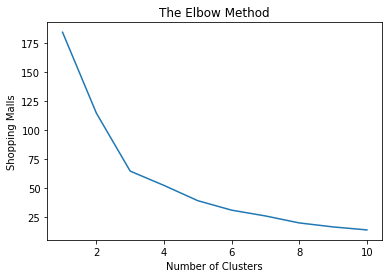

In [11]:
plt.plot(range(1,11),Shopping_malls)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Shopping Malls")
plt.show()

In [12]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

In [13]:
kmeans.labels_

array([2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 2, 1, 0, 1, 1, 0, 1, 1, 2, 2, 2, 1,
       1, 2, 1, 2])

In [14]:
udf.head()

,localities,No of shopping malls,Population,No of shopping malls_zscore,Population_zscore
0,Alandi Road,8.0,28576.0,2.236840,0.264729
1,Ambegaon Budruk,2.0,23597.0,-0.142227,-0.009255
2,Anandnagar,2.0,10113.0,-0.142227,-0.751250
3,Aundh,6.0,17766.0,1.443818,-0.330122
4,Aundh Road,6.0,15205.0,1.443818,-0.471048


## Examining CLusters 

In [15]:
k_merge=udf.copy()

In [16]:
k_merge["clustlabel"]=kmeans.labels_

In [17]:
k_merge.head()

,localities,No of shopping malls,Population,No of shopping malls_zscore,Population_zscore,clustlabel
0,Alandi Road,8.0,28576.0,2.236840,0.264729,2
1,Ambegaon Budruk,2.0,23597.0,-0.142227,-0.009255,1
2,Anandnagar,2.0,10113.0,-0.142227,-0.751250,1
3,Aundh,6.0,17766.0,1.443818,-0.330122,2
4,Aundh Road,6.0,15205.0,1.443818,-0.471048,2


In [22]:
k_merge.loc[k_merge['clustlabel'] == 0]

,localities,No of shopping malls,Population,No of shopping malls_zscore,Population_zscore,clustlabel
14,Camp,8.0,79454.0,2.236840,3.064435,0
15,Chandan Nagar,0.0,66867.0,-0.935249,2.371799,0
18,Dehu Road,0.0,48961.0,-0.935249,1.386471,0
40,Kharadi,1.0,70000.0,-0.538738,2.544202,0
42,Kondhwa Budruk,2.0,45476.0,-0.142227,1.194699,0
47,Lulla Nagar,1.0,49363.0,-0.538738,1.408592,0
69,Sadashiv Peth,4.0,100000.0,0.650796,4.195036,0
78,Sinhagad Road,5.0,60000.0,1.047307,1.993923,0
81,Tilak Road,1.0,99000.0,-0.538738,4.140009,0


In [23]:
k_merge.loc[k_merge['clustlabel'] == 1]

,localities,No of shopping malls,Population,No of shopping malls_zscore,Population_zscore,clustlabel
1,Ambegaon Budruk,2.0,23597.0,-0.142227,-0.009255,1
2,Anandnagar,2.0,10113.0,-0.142227,-0.751250,1
5,Balaji Nagar,1.0,19916.0,-0.538738,-0.211812,1
6,Baner,1.0,31972.0,-0.538738,0.451603,1
7,Baner road,0.0,24574.0,-0.935249,0.044507,1
...,...,...,...,...,...,...
82,Uruli Devachi,3.0,9403.0,0.254284,-0.790320,1
83,Vadgaon Budruk,1.0,25876.0,-0.538738,0.116154,1
87,Wagholi,1.0,33479.0,-0.538738,0.534530,1
88,Wakadewadi,0.0,23689.0,-0.935249,-0.004192,1


In [24]:
k_merge.loc[k_merge['clustlabel'] == 2]

,localities,No of shopping malls,Population,No of shopping malls_zscore,Population_zscore,clustlabel
0,Alandi Road,8.0,28576.0,2.236840,0.264729,2
3,Aundh,6.0,17766.0,1.443818,-0.330122,2
4,Aundh Road,6.0,15205.0,1.443818,-0.471048,2
31,Hadapsar,8.0,40932.0,2.236840,0.944653,2
52,Model colony,7.0,14892.0,1.840329,-0.488272,2
54,Mundhawa,6.0,19153.0,1.443818,-0.253799,2
55,Nagar Road,6.0,26134.0,1.443818,0.130351,2
73,Satara Road,6.0,9935.0,1.443818,-0.761045,2
76,Shivaji Nagar,12.0,13877.0,3.822885,-0.544125,2
84,Wadgaon Sheri,6.0,39000.0,1.443818,0.838339,2


In [25]:
kmeans.cluster_centers_

array([[ 0.03400036,  2.47768509],
       [-0.37783496, -0.31091102],
       [ 1.8403292 , -0.06045038]])

In [26]:
y_km = kmeans.fit_predict(X)

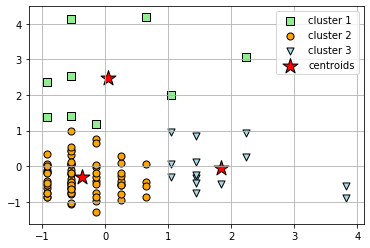

In [27]:
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()


## SILHOUETTE METHOD 

In [28]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [29]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples, silhouette_score

from yellowbrick.cluster import SilhouetteVisualizer

In [30]:
def sil_score(X, from_k=2, to_k=6):
    '''
    calculate silhouette score for k clusters
    '''
    sils=[]
    for k in range(from_k, to_k + 1):
        m = KMeans(n_clusters=k)
        m.fit(X)
        # The silhouette_score gives the average value for all the samples
        silhouette_avg = silhouette_score(X, m.labels_).round(4)
        sils.append([silhouette_avg, k])
        
#         Compute the silhouette scores for each sample
#         sample_silhouette_values = silhouette_samples(X, m.labels_)
#         print(sample_silhouette_values)
#     return max(sils)[1]
    return sils

In [31]:
ss=sil_score(X, 2, 5)
print(f'scores = {ss}')
print(f'optimal number of clusters = {max(ss)[1]}')

scores = [[0.5388, 2], [0.5521, 3], [0.3528, 4], [0.3752, 5]]
optimal number of clusters = 3


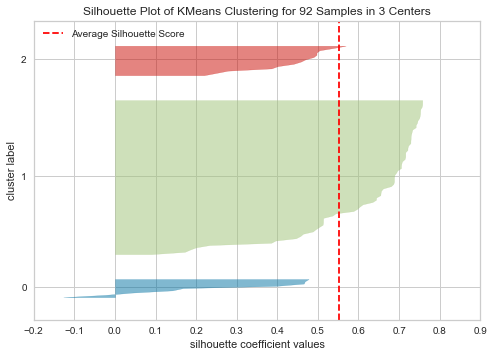

In [32]:
# Instantiate the clustering model and visualizer
model = KMeans(n_clusters=3,random_state=0)
visualizer = SilhouetteVisualizer(model,colors='yellowbrick')

visualizer.fit(X) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data

In [33]:
def silhouette_plot(X, from_k, to_k):
    sil_scores=[]
    for k in range(from_k, to_k + 1):
        # Instantiate the clustering model and visualizer
        m = KMeans(n_clusters=k)
        visualizer = SilhouetteVisualizer(m)
        visualizer.fit(X) # Fit the training data to the visualizer
        visualizer.poof() # Draw/show/poof the data
#         print(visualizer.silhouette_score_)
#         sil_scores.append([k, visualizer.silhouette_score_])
        sil_scores.append([visualizer.silhouette_score_, k])
    return sil_scores

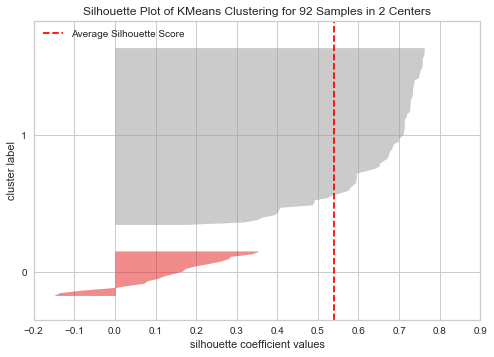

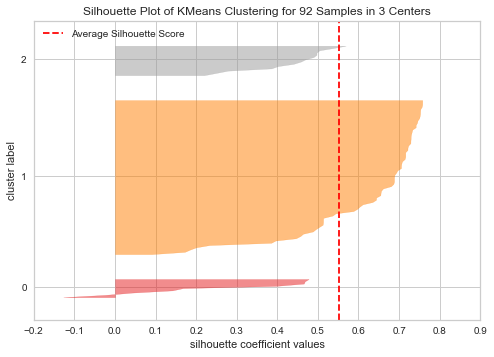

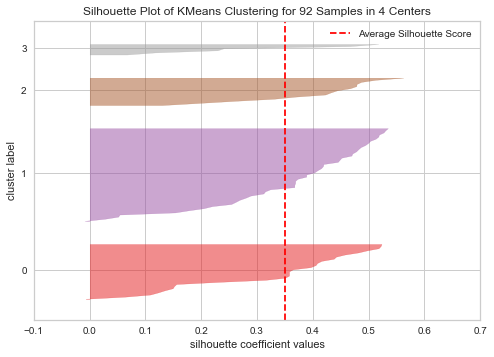

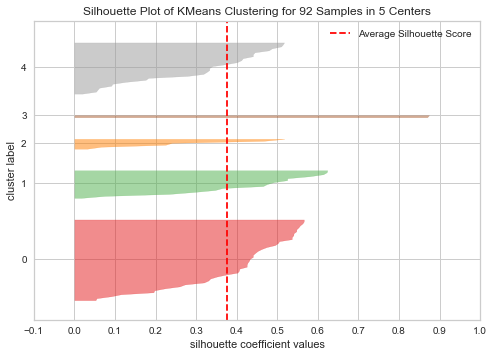

In [34]:
scores=silhouette_plot(X, 2, 5)